In [1]:
!pip install statsmodels


In [2]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


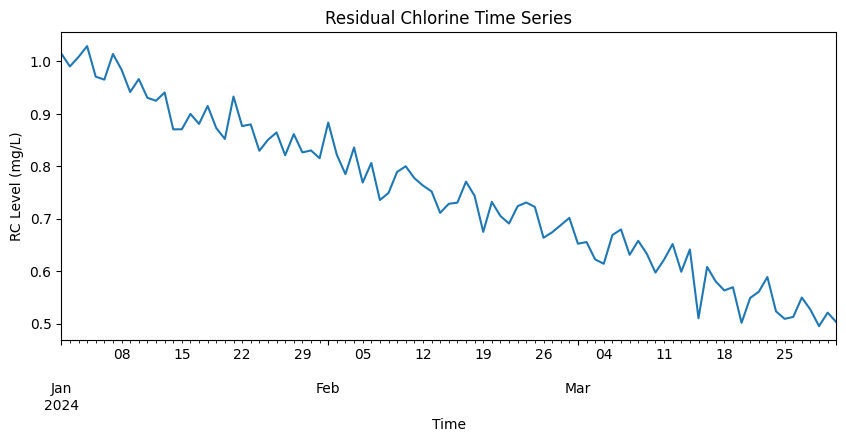

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
csv_path = "/content/drive/MyDrive/rcdc/rc_time_series.csv"
df = pd.read_csv(csv_path)

# Example: ensure 'Time' is datetime and 'RC_Level' is the residual chlorine value
df['Time'] = pd.to_datetime(df['Time'])
df.set_index('Time', inplace=True)

# Plot to inspect
df['RC_Level'].plot(title="Residual Chlorine Time Series", figsize=(10, 4))
plt.ylabel("RC Level (mg/L)")
plt.show()


In [4]:
from statsmodels.tsa.arima.model import ARIMA

# ARMA(p, q) is equivalent to ARIMA(p, 0, q)
# Example: ARMA(2, 2)
model = ARIMA(df['RC_Level'], order=(2, 0, 2))
model_fit = model.fit()

# Print summary
print(model_fit.summary())


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


                               SARIMAX Results                                
Dep. Variable:               RC_Level   No. Observations:                   91
Model:                 ARIMA(2, 0, 2)   Log Likelihood                 176.622
Date:                Sat, 24 May 2025   AIC                           -341.244
Time:                        03:42:38   BIC                           -326.178
Sample:                    01-01-2024   HQIC                          -335.166
                         - 03-31-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7566      0.242      3.121      0.002       0.282       1.232
ar.L1          0.0783      0.175      0.447      0.655      -0.265       0.422
ar.L2          0.9176      0.176      5.201      0.0

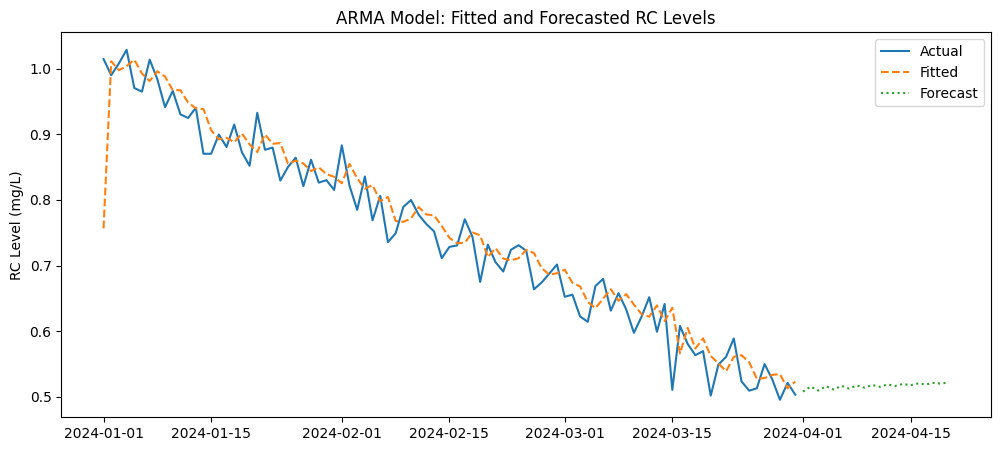

In [5]:
# Predict in-sample
df['Predicted'] = model_fit.fittedvalues

# Forecast next N steps
forecast_steps = 20
forecast = model_fit.forecast(steps=forecast_steps)

# Plot actual vs predicted
plt.figure(figsize=(12, 5))
plt.plot(df['RC_Level'], label='Actual')
plt.plot(df['Predicted'], label='Fitted', linestyle='--')
plt.plot(pd.date_range(df.index[-1], periods=forecast_steps+1, freq='D')[1:], forecast, label='Forecast', linestyle=':')
plt.legend()
plt.title("ARMA Model: Fitted and Forecasted RC Levels")
plt.ylabel("RC Level (mg/L)")
plt.show()


In [6]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Compare actual and fitted
mse = mean_squared_error(df['RC_Level'], df['Predicted'])
mae = mean_absolute_error(df['RC_Level'], df['Predicted'])

print(f"📉 Mean Squared Error: {mse:.4f}")
print(f"📉 Mean Absolute Error: {mae:.4f}")


📉 Mean Squared Error: 0.0019
📉 Mean Absolute Error: 0.0300


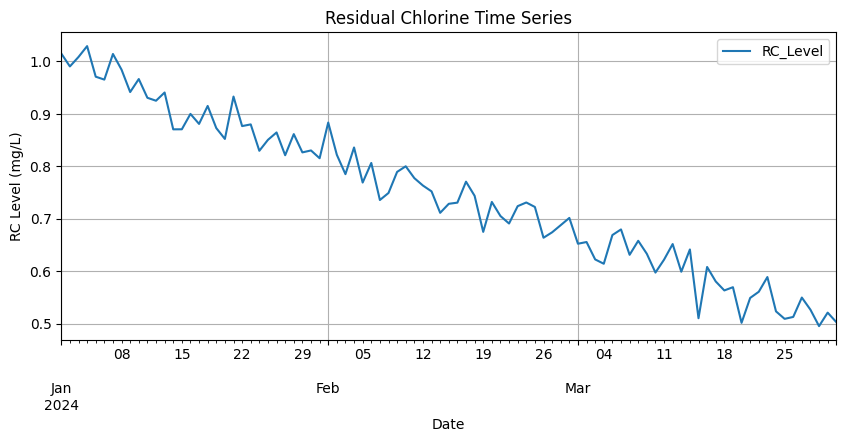

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


                               SARIMAX Results                                
Dep. Variable:               RC_Level   No. Observations:                   91
Model:                 ARIMA(2, 0, 2)   Log Likelihood                 176.622
Date:                Sat, 24 May 2025   AIC                           -341.244
Time:                        03:43:07   BIC                           -326.178
Sample:                    01-01-2024   HQIC                          -335.166
                         - 03-31-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7566      0.242      3.121      0.002       0.282       1.232
ar.L1          0.0783      0.175      0.447      0.655      -0.265       0.422
ar.L2          0.9176      0.176      5.201      0.0

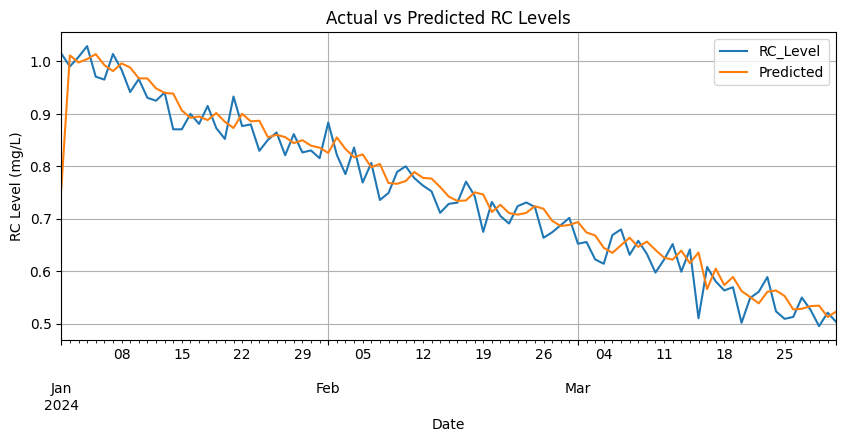

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load the sample data
df = pd.read_csv("/content/drive/MyDrive/rcdc/rc_time_series.csv", parse_dates=['Time'])
df.set_index('Time', inplace=True)

# Visual inspection (optional)
df.plot(title="Residual Chlorine Time Series", figsize=(10, 4))
plt.ylabel("RC Level (mg/L)")
plt.xlabel("Date")
plt.grid(True)
plt.show()

# Fit ARMA model (ARIMA with d=0)
# AR(p), MA(q) orders — try (2, 0, 2) as a reasonable starting point
model = ARIMA(df['RC_Level'], order=(2, 0, 2))
model_fit = model.fit()

# Print summary
print(model_fit.summary())

# Make predictions
df['Predicted'] = model_fit.predict(start=0, end=len(df)-1)

# Evaluate
mse = mean_squared_error(df['RC_Level'], df['Predicted'])
mae = mean_absolute_error(df['RC_Level'], df['Predicted'])
print(f"\n📉 Mean Squared Error: {mse:.5f}")
print(f"📉 Mean Absolute Error: {mae:.5f}")

# Plot actual vs predicted
df[['RC_Level', 'Predicted']].plot(title="Actual vs Predicted RC Levels", figsize=(10, 4))
plt.ylabel("RC Level (mg/L)")
plt.xlabel("Date")
plt.grid(True)
plt.show()
